# Quantization Theory

#### Libraries to install
- If you are running this notebook on your local machine, you can install the following:

```Python
!pip install transformers==4.35.0
!pip install quanto==0.0.11
!pip install torch==2.1.1
```

## Linear Quantization 

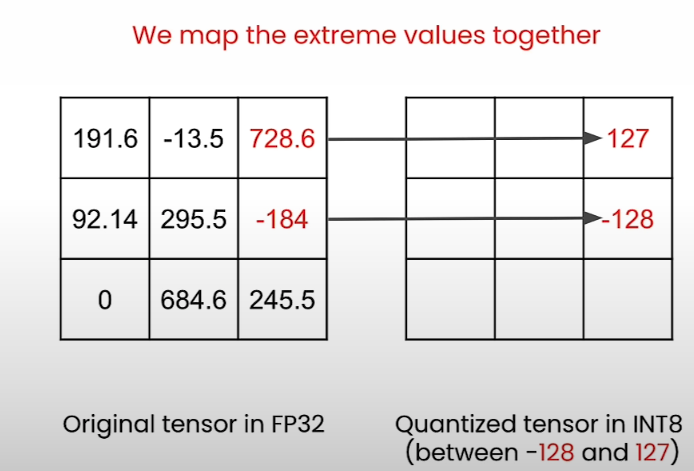

## will be like:



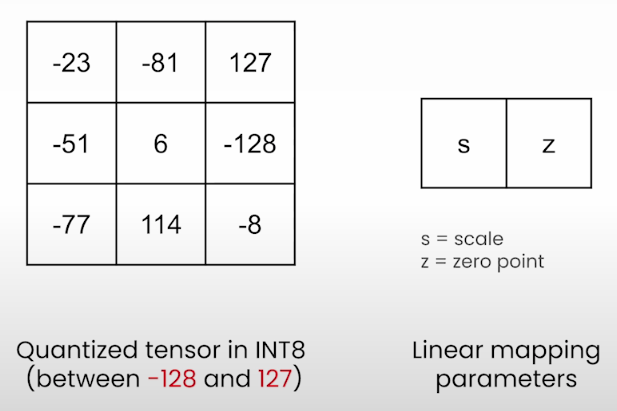


## T5-FLAN
- Please note that due to hardware memory constraints, and in order to offer this course for free to everyone, the code you'll run here is for the T5-FLAN model instead of the EleutherAI AI Pythia model.  
- Thank you for your understanding! 🤗

For the T5-FLAN model, here is one more library to install if you are running locally:
```Python
!pip install sentencepiece==0.2.0
```


### Without Quantization

In [1]:
model_name = "google/flan-t5-small"

In [2]:
import sentencepiece as spm
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

In [4]:
input_text = "Hello, my name is "
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
#print(outputs)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.11/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


annie scott


lets check the size of the model

In [5]:
from helper import compute_module_sizes
module_sizes = compute_module_sizes(model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

The model size is 0.307844608 GB


let's look at the weights of the model in say layer 1

In [6]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_auto_class',
 '_backward_compatibility_gradient_checkpointing',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_check_and_enable_flash_attn_2',
 '_compiled_call_impl',
 '_convert_head_mask_to_5d',
 '_copy_lm_head_original_to_resized',
 '_create_repo',
 '_dispatch_accelerate_model',
 '_expand_inputs_for_generation',
 '_extend_attention_mask',
 '_extend_token_type_ids',
 '_extract_past_from_model_output',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs'

In [7]:
print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo): 

## Quantize the model (8-bit precision)

In [8]:
from quanto import quantize, freeze
import torch

In [9]:
quantize(model, weights=torch.int8, activations=None) # to only quatize the weights

### Freeze the model
- This step takes a bit of memory, and so for the Pythia model that is shown in the lecture video, it will not run in the classroom.
- This will work fine with the smaller T5-Flan model.

In [10]:
freeze(model)

In [11]:
print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): QLinear(in_features=512, out_features=384, bias=False)
              (k): QLinear(in_features=512, out_features=384, bias=False)
              (v): QLinear(in_features=512, out_features=384, bias=False)
              (o): QLinear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): QLinear(in_features=512, out_features=1024, bias=False)
              (wi_1): QLinear(in_features=512, out_features=1024, bias=False)
              

In [12]:
module_sizes = compute_module_sizes(model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

The model size is 0.12682868 GB


### Try running inference on the quantized model

In [14]:
input_text = "Hello, my name is "
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

annie scott


- Load [EleutherAI/pythia-410m](https://huggingface.co/EleutherAI/pythia-410m) model and tokenizer.

```Python
from transformers import AutoModelForCausalLM
model_name = "EleutherAI/pythia-410m"

model = AutoModelForCausalLM.from_pretrained(model_name,
                                             low_cpu_mem_usage=True)
print(model.gpt_neox)


from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

- Write a start of a (`text`) sentence which you'd like the model to complete.
```Python
text = "Hello my name is"
inputs = tokenizer(text, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=10)
outputs
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
```

- Compute the model's size using the helper function, `compute_module_sizes`.
```Python
from helper import compute_module_sizes
module_sizes = compute_module_sizes(model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")
print(model.gpt_neox.layers[0].attention.dense.weight)
```
**Note:** The weights are in `fp32`.

### 8-bit Quantization

```Python
from quanto import quantize, freeze
import torch

quantize(model, weights=torch.int8, activations=None)
# after performing quantization
print(model.gpt_neox)
print(model.gpt_neox.layers[0].attention.dense.weight)
```

- The "freeze" function requires more memory than is available in this classroom.
- This code will run on a machine that has 8GB of memory, and so it will likely work if you run this code on your local machine.

```Python
# freeze the model
freeze(model)
print(model.gpt_neox.layers[0].attention.dense.weight)

# get model size after quantization
module_sizes = compute_module_sizes(model)
print(f"The model size is {module_sizes[''] * 1e-9} GB")

# run inference after quantizing the model
outputs = model.generate(**inputs, max_new_tokens=10)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
```

#### Comparing "linear quantization" to "downcasting"

To recap the difference between the "linear quantization" method in this lesson with the "downcasting" method in the previous lesson:

- When downcasting a model, you convert the model's parameters to a more compact data type (bfloat16).  During inference, the model performs its calculations in this data type, and its activations are in this data type.  Downcasting may work with the bfloat16 data type, but the model performance will likely degrade with any smaller data type, and won't work if you convert to an integer data type (like the int8 in this lesson).


- In this lesson, you used another quantization method, "linear quantization", which enables the quantized model to maintain performance much closer to the original model by converting from the compressed data type back to the original FP32 data type during inference. So when the model makes a prediction, it is performing the matrix multiplications in FP32, and the activations are in FP32.  This enables you to quantize the model in data types smaller than bfloat16, such as int8, in this example.